In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
# Fonte do dataset: 
# https://www.kaggle.com/datasets/prasertk/healthy-lifestyle-cities-report-2021?resource=download

In [17]:
df = pd.read_csv('healthy_lifestyle_city_2021.csv')
df.head(10)

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53
5,Helsinki,6,1662,£1.60,22.20%,80.4,13.08,1540,7.80,113,309,£35.23
6,Fukuoka,7,2769,£0.78,4.30%,83.2,-,1644,5.87,35,539,£55.87
7,Berlin,8,1626,£1.55,22.30%,80.6,39.41,1386,7.07,254,1729,£26.11
8,Barcelona,9,2591,£1.19,23.80%,82.2,65.19,1686,6.40,585,2344,£37.80
9,Vancouver,10,1938,£1.08,29.40%,81.7,24.26,1670,7.23,218,788,£31.04


In [4]:
print(df.shape)
df.info()

(44, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    44 non-null     object 
 1   Rank                                    44 non-null     int64  
 2   Sunshine hours(City)                    44 non-null     object 
 3   Cost of a bottle of water(City)         44 non-null     object 
 4   Obesity levels(Country)                 44 non-null     object 
 5   Life expectancy(years) (Country)        44 non-null     float64
 6   Pollution(Index score) (City)           44 non-null     object 
 7   Annual avg. hours worked                44 non-null     object 
 8   Happiness levels(Country)               44 non-null     float64
 9   Outdoor activities(City)                44 non-null     int64  
 10  Number of take out places(City)         44 non-null    

# Limpeza do df

In [5]:
#Transformando o dataset em apenas dados númericos para que possa ser normalizado

df = df.replace("-", "")

In [6]:
df['Sunshine hours(City)'] = pd.Series(df['Sunshine hours(City)'])
df['Sunshine hours(City)'] = pd.to_numeric(df['Sunshine hours(City)'])

df['Cost of a bottle of water(City)'] = df['Cost of a bottle of water(City)'].str.lstrip('£').astype('float')

df['Obesity levels(Country)'] = df['Obesity levels(Country)'].str.rstrip('%').astype('float')

df['Pollution(Index score) (City)'] = pd.Series(df['Pollution(Index score) (City)'])
df['Pollution(Index score) (City)'] = pd.to_numeric(df['Pollution(Index score) (City)'])

df['Annual avg. hours worked'] = pd.Series(df['Annual avg. hours worked'])
df['Annual avg. hours worked'] = pd.to_numeric(df['Annual avg. hours worked'])

df['Cost of a monthly gym membership(City)'] = df['Cost of a monthly gym membership(City)'].str.lstrip('£').astype('float')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    44 non-null     object 
 1   Rank                                    44 non-null     int64  
 2   Sunshine hours(City)                    43 non-null     float64
 3   Cost of a bottle of water(City)         44 non-null     float64
 4   Obesity levels(Country)                 44 non-null     float64
 5   Life expectancy(years) (Country)        44 non-null     float64
 6   Pollution(Index score) (City)           43 non-null     float64
 7   Annual avg. hours worked                33 non-null     float64
 8   Happiness levels(Country)               44 non-null     float64
 9   Outdoor activities(City)                44 non-null     int64  
 10  Number of take out places(City)         44 non-null     int64  


In [27]:
# Resumo dos dados

df_v1 = df.drop(columns = ['Rank'])
df_v1.head()

,City,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53


# Construindo a Matriz de correlação

C:\Users\Gustavo Cunha\anaconda3\lib\site-packages\biokit\viz\corrplot.py:268: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()
C:\Users\GUSTAV~1\AppData\Local\Temp/ipykernel_12240/2046250487.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


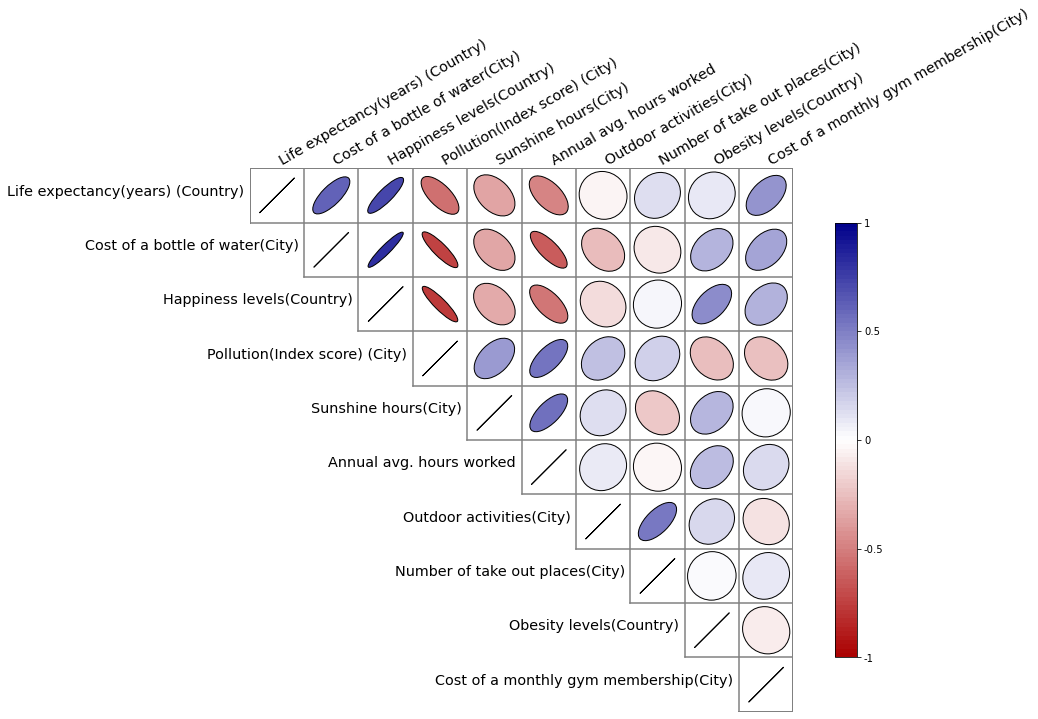

In [16]:
from biokit.viz import corrplot
import matplotlib.pyplot as plt

matriz = df_v1.corr()

corr_grafico = corrplot.Corrplot(matriz)
corr_grafico.plot(upper = 'ellipse', fontsize = 'x-large')

fig = plt.gcf()
fig.set_size_inches(15,10)
fig.show()

# Construindo o df de treino

In [20]:
# Normalizando as variáveis

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

df_v2 = df_v1.drop(columns = ['City'])

np_df = min_max_scaler.fit_transform(df_v2)
colunas = df_v2.columns

In [30]:
df_norm = pd.DataFrame(np_df, columns = colunas)
df_norm.head()

,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,0.211979,0.580328,0.510836,0.925651,0.226926,0.071334,0.914894,0.709964,0.129398,0.330119
1,0.576041,0.436066,0.777090,0.959108,0.175184,0.438573,0.862884,0.681495,0.138317,0.448633
2,0.224146,0.586885,0.501548,0.918216,0.054030,0.159841,0.879433,0.193950,0.122912,0.169530
3,0.194665,0.514754,0.517028,0.947955,0.083270,0.095112,0.893617,0.188612,0.056429,0.372370
4,0.105288,0.668852,0.489164,0.873606,0.103738,0.000000,0.962175,0.233096,0.044268,0.288569


In [31]:
# Verificando valores vazios

df_norm.isnull().sum()

Sunshine hours(City)                       1
Cost of a bottle of water(City)            0
Obesity levels(Country)                    0
Life expectancy(years) (Country)           0
Pollution(Index score) (City)              1
Annual avg. hours worked                  11
Happiness levels(Country)                  0
Outdoor activities(City)                   0
Number of take out places(City)            0
Cost of a monthly gym membership(City)     0
dtype: int64

In [ ]:
# Tratando valores vazios

# Escolhendo os melhores parâmetros para cada algorítimo

In [23]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [24]:
# KMeans

from sklearn.cluster import KMeans

faixa_n_clusters = [i for i in range(2,10)]
valores_silhueta = []

for k in faixa_n_clusters:
    agrupador = KMeans(n_clusters=k, random_state=1337)
    labels = agrupador.fit_predict(df_norm)
    media_silhueta = silhouette_score(df_norm, labels)
    valores_silhueta.append(media_silhueta)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').